In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt

import time, datetime, socket

import tfdiffeq
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

# tf.config.list_physical_devices('GPU')

device = 'cpu:0' 

print(f"author  {socket.gethostname():>28}")
print(f"version {str(datetime.datetime.now()):>28}")
print(f"device  {device:>28}")

author                           NOB
version   2023-07-02 14:09:02.036412
device                         cpu:0


#### load tclab test data  

model.4.6  
model.q.3

In [3]:
from _helpers import Helpers_

names = ["model.4.6", "model.q.3"]

data = []
for i,name in enumerate(names):
    fname = os.path.join(os.getcwd(),"data","tclab.%s.csv"%(name))
    t,u,y,data_size = Helpers_.tfload_(fname)

    print(f"     {i:>10}")
    print(f"data {name:>10}")
    print(f"size {data_size:>10}")

    data.append(
        dict(
            name=name,
            fname=fname,
            t=t,u=u,y=y,data_size=data_size
        )
    )

              0
data  model.4.6
size       4320
              1
data  model.q.3
size       1200


### load a n-ode model

In [13]:
model_name = "tclab.model.q.3.node.tf"
model = tf.keras.models.load_model(os.path.join(os.getcwd(),"data",model_name),compile=False)
model.summary()

Model: "neural_ode"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 n-ode (Sequential)          (None, 1)                 151       
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [14]:
from _models import SurrogateODE, ParamsODE, HelperODE


In [15]:
for d in data:
    d["result"] = HelperODE.test_(device, model, t=d["t"],u=d["u"],y=d["y"],data_size=d["data_size"], name=d["name"], verbose=1)

model.4.6
data size 4320; batch time 2 due 0 size 2160
loss test 0.040219 and surrogate 0.046306
model.q.3
data size 1200; batch time 2 due 0 size 600
loss test 0.010287 and surrogate 0.012702


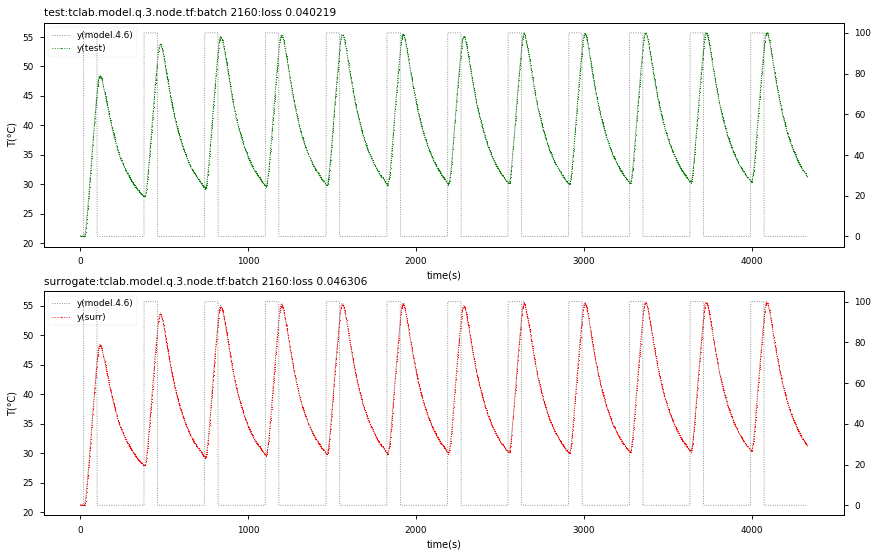

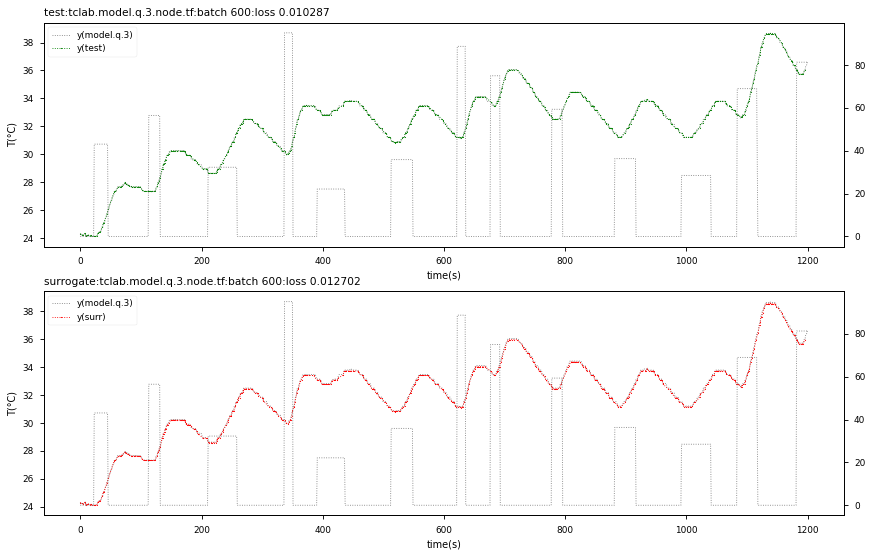

In [16]:
for d in data:

    ts = d["t"].numpy()
    us = d["u"].numpy()
    ys = d["y"].numpy()

    r = d["result"]

    HelperODE.plot_(ts,us,ys,
            yy=[r["y_test"],r["y_bala"]],
            loss=[r["l_test"],r["l_bala"]],
            indizes=r["batch_i"],
            size=r["batch_size"],
            name=d["name"],
            model_name=model_name,
            dpi=100
            )